In [1]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
SOURCE = 'messi.jpg'
DEST = 'mark-zuckerberg.jpg'

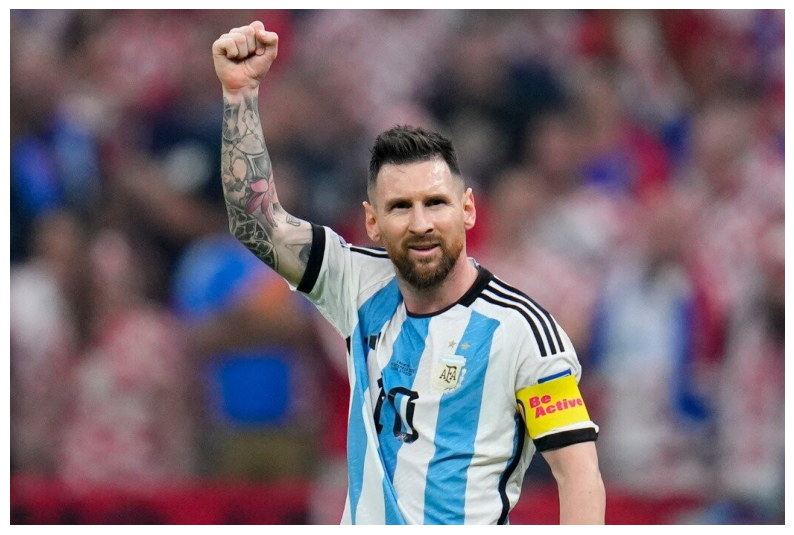

In [3]:
img = cv2.imread(SOURCE)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

[(489, 265), (491, 283), (495, 302), (499, 318), (508, 333), (519, 345), (531, 355), (544, 364), (559, 365), (573, 361), (585, 351), (596, 338), (604, 324), (609, 308), (611, 290), (610, 271), (610, 252), (500, 265), (506, 256), (516, 252), (528, 252), (539, 253), (553, 252), (563, 248), (574, 247), (585, 249), (591, 256), (546, 262), (548, 273), (549, 284), (551, 295), (538, 300), (545, 303), (552, 305), (559, 301), (565, 297), (513, 267), (519, 263), (526, 262), (533, 266), (526, 267), (520, 267), (562, 264), (567, 259), (574, 258), (580, 261), (575, 262), (568, 263), (534, 320), (539, 316), (547, 315), (554, 316), (561, 314), (568, 314), (576, 316), (570, 325), (563, 330), (555, 332), (548, 331), (540, 328), (537, 320), (547, 318), (554, 319), (561, 318), (573, 317), (562, 323), (555, 325), (547, 324)]


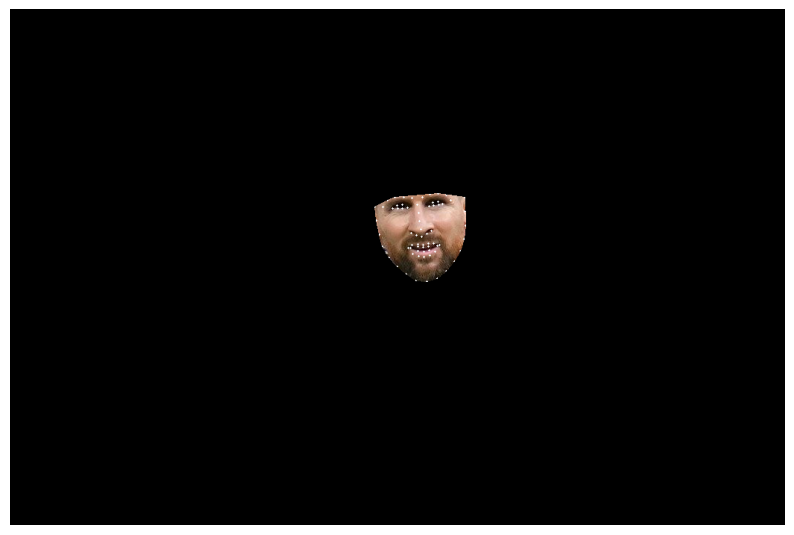

In [4]:
img_copy1 = np.copy(img)
img_gray_copy1 = np.copy(img_gray)
mask_copy = np.copy(mask)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray_copy1)
for face in faces:
    landmarks = predictor(img_gray_copy1, face)
    
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        
        cv2.circle(img_copy1, (x, y), 1, (255, 255, 255), -1)
    print(landmarks_points)    
    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
#     cv2.polylines(img_copy1, [convexhull], True, (255, 0, 0), 2)
    cv2.fillConvexPoly(mask_copy, convexhull, 255)
    face_image_1 = cv2.bitwise_and(img_copy1, img_copy1, mask=mask_copy)
#     face_image_1 = cv2.bitwise_and(img, img)
plt.axis("off")
plt.imshow(cv2.cvtColor(face_image_1, cv2.COLOR_BGR2RGB))
plt.show() 

[(489, 265), (491, 283), (495, 302), (499, 318), (508, 333), (519, 345), (531, 355), (544, 364), (559, 365), (573, 361), (585, 351), (596, 338), (604, 324), (609, 308), (611, 290), (610, 271), (610, 252), (500, 265), (506, 256), (516, 252), (528, 252), (539, 253), (553, 252), (563, 248), (574, 247), (585, 249), (591, 256), (546, 262), (548, 273), (549, 284), (551, 295), (538, 300), (545, 303), (552, 305), (559, 301), (565, 297), (513, 267), (519, 263), (526, 262), (533, 266), (526, 267), (520, 267), (562, 264), (567, 259), (574, 258), (580, 261), (575, 262), (568, 263), (534, 320), (539, 316), (547, 315), (554, 316), (561, 314), (568, 314), (576, 316), (570, 325), (563, 330), (555, 332), (548, 331), (540, 328), (537, 320), (547, 318), (554, 319), (561, 318), (573, 317), (562, 323), (555, 325), (547, 324)]


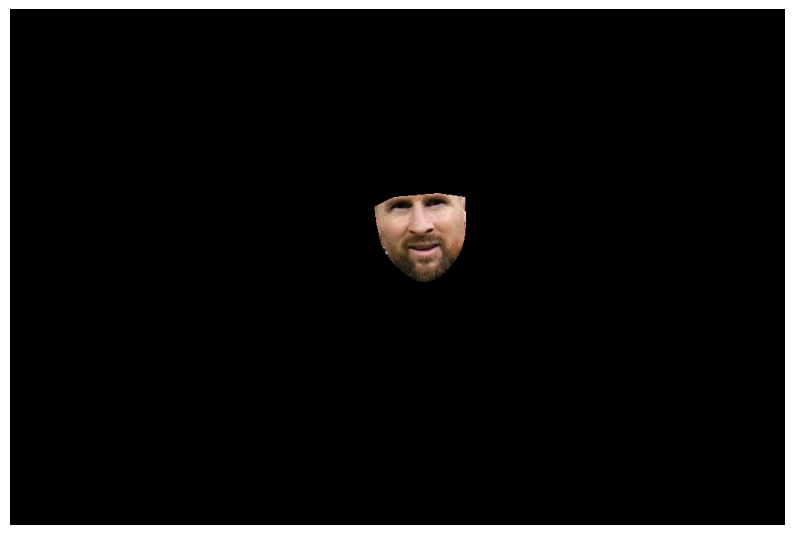

In [5]:
img_copy1 = np.copy(img)
img_gray_copy1 = np.copy(img_gray)
mask_copy = np.copy(mask)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray_copy1)
for face in faces:
    landmarks = predictor(img_gray_copy1, face)
    
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        
#         cv2.circle(img_copy1, (x, y), 1, (255, 255, 255), -1)
    print(landmarks_points)    
    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
#     cv2.polylines(img_copy1, [convexhull], True, (255, 0, 0), 2)
    cv2.fillConvexPoly(mask_copy, convexhull, 255)
    face_image_1 = cv2.bitwise_and(img_copy1, img_copy1, mask=mask_copy)
#     face_image_1 = cv2.bitwise_and(img, img)
plt.axis("off")
plt.imshow(cv2.cvtColor(face_image_1, cv2.COLOR_BGR2RGB))
plt.show() 

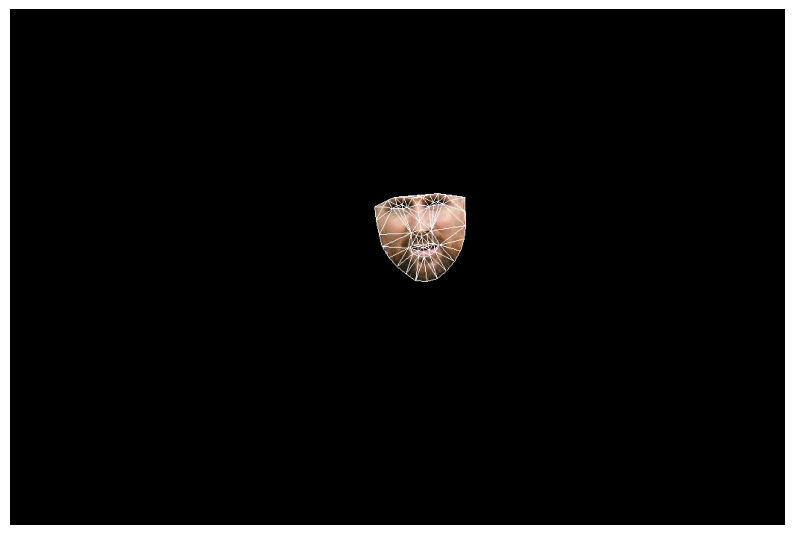

In [6]:
face_img_copy = np.copy(face_image_1)

# Delaunay triangulation
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(landmarks_points)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    cv2.line(face_img_copy, pt1, pt2, (255, 255, 255), 1)
    cv2.line(face_img_copy, pt2, pt3, (255, 255, 255), 1)
    cv2.line(face_img_copy, pt1, pt3, (255, 255, 255), 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(face_img_copy, cv2.COLOR_BGR2RGB))
plt.show()

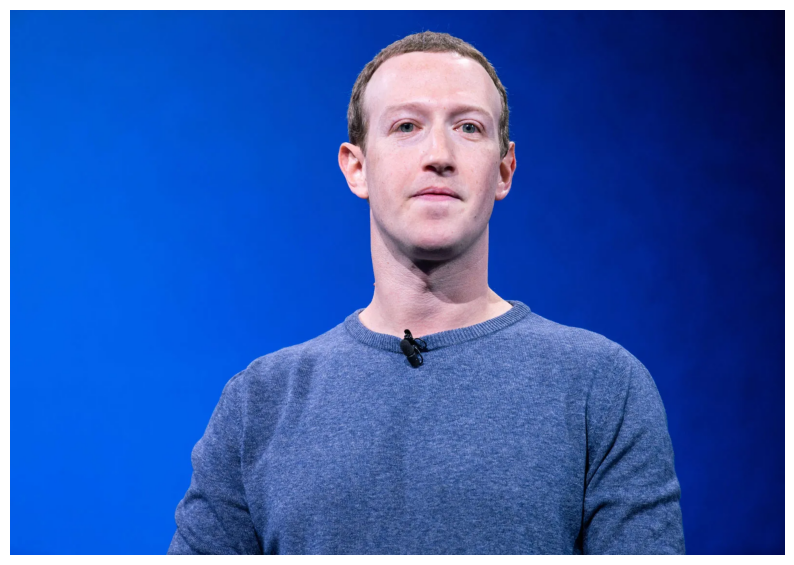

In [7]:
img2 = cv2.imread(DEST)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask2 = np.zeros_like(img_gray2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

[(728, 284), (733, 321), (737, 358), (743, 395), (753, 429), (772, 457), (800, 478), (833, 493), (873, 498), (912, 495), (945, 483), (971, 460), (989, 431), (999, 396), (1004, 361), (1010, 326), (1015, 289), (763, 231), (778, 206), (807, 193), (838, 193), (866, 204), (904, 205), (932, 196), (961, 198), (987, 212), (999, 237), (885, 234), (886, 258), (888, 281), (889, 305), (859, 331), (873, 335), (887, 339), (900, 336), (911, 332), (794, 253), (809, 239), (828, 237), (846, 249), (829, 254), (810, 256), (919, 250), (937, 238), (956, 240), (969, 253), (955, 256), (937, 254), (825, 391), (849, 374), (870, 366), (884, 370), (899, 367), (916, 377), (932, 393), (914, 399), (896, 404), (881, 404), (865, 403), (846, 397), (835, 389), (869, 381), (884, 383), (898, 383), (923, 391), (897, 385), (882, 386), (867, 384)]


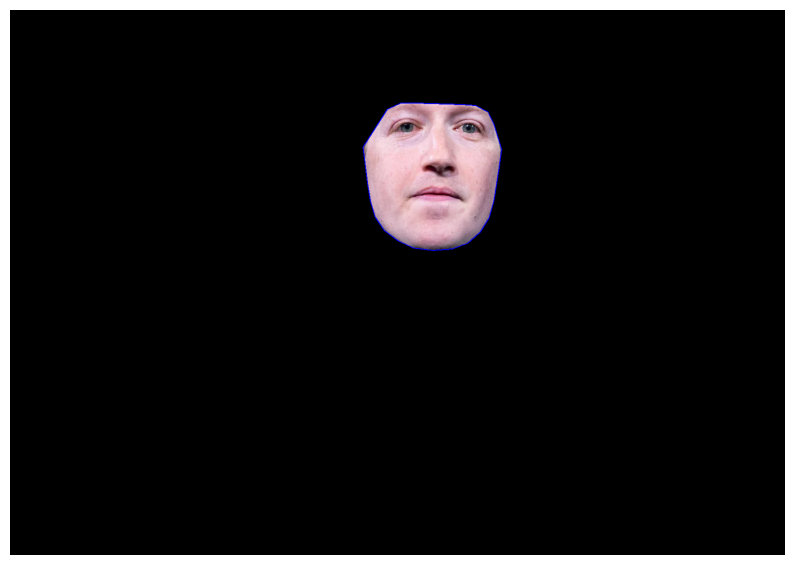

In [9]:
img_copy2 = np.copy(img2)
img_gray_copy2 = np.copy(img_gray2)
mask_copy2 = np.copy(mask2)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray_copy2)
for face in faces:
    landmarks2 = predictor(img_gray_copy2, face)
    
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks2.part(n).x
        y = landmarks2.part(n).y
        landmarks_points2.append((x, y))
        
#         cv2.circle(img2, (x, y), 2, (255, 255, 255), -1)
    print(landmarks_points2)    
    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)
    cv2.polylines(img_copy2, [convexhull2], True, (255, 0, 0), 2)
    cv2.fillConvexPoly(mask2, convexhull2, 255)
    face_image_2 = cv2.bitwise_and(img_copy2, img_copy2, mask=mask_copy2)
#     face_image_2 = cv2.bitwise_and(img2, img2)
plt.axis("off")

plt.imshow(cv2.cvtColor(face_image_2, cv2.COLOR_BGR2RGB))
plt.show()  

[(728, 284), (733, 321), (737, 358), (743, 395), (753, 429), (772, 457), (800, 478), (833, 493), (873, 498), (912, 495), (945, 483), (971, 460), (989, 431), (999, 396), (1004, 361), (1010, 326), (1015, 289), (763, 231), (778, 206), (807, 193), (838, 193), (866, 204), (904, 205), (932, 196), (961, 198), (987, 212), (999, 237), (885, 234), (886, 258), (888, 281), (889, 305), (859, 331), (873, 335), (887, 339), (900, 336), (911, 332), (794, 253), (809, 239), (828, 237), (846, 249), (829, 254), (810, 256), (919, 250), (937, 238), (956, 240), (969, 253), (955, 256), (937, 254), (825, 391), (849, 374), (870, 366), (884, 370), (899, 367), (916, 377), (932, 393), (914, 399), (896, 404), (881, 404), (865, 403), (846, 397), (835, 389), (869, 381), (884, 383), (898, 383), (923, 391), (897, 385), (882, 386), (867, 384)]


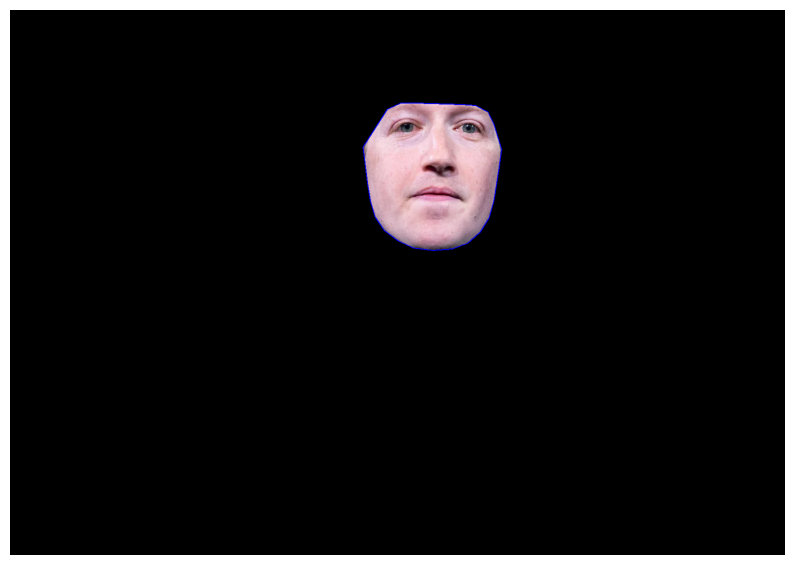

In [10]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray2)
for face in faces:
    landmarks2 = predictor(img_gray2, face)
    
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks2.part(n).x
        y = landmarks2.part(n).y
        landmarks_points2.append((x, y))
        
#         cv2.circle(img2, (x, y), 2, (255, 255, 255), -1)
    print(landmarks_points2)    
    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)
#     cv2.polylines(img2, [convexhull2], True, (255, 0, 0), 2)
    cv2.fillConvexPoly(mask2, convexhull2, 255)
    face_image_2 = cv2.bitwise_and(img2, img2, mask=mask2)
#     face_image_2 = cv2.bitwise_and(img2, img2)
plt.axis("off")

plt.imshow(cv2.cvtColor(face_image_2, cv2.COLOR_BGR2RGB))
plt.show()  

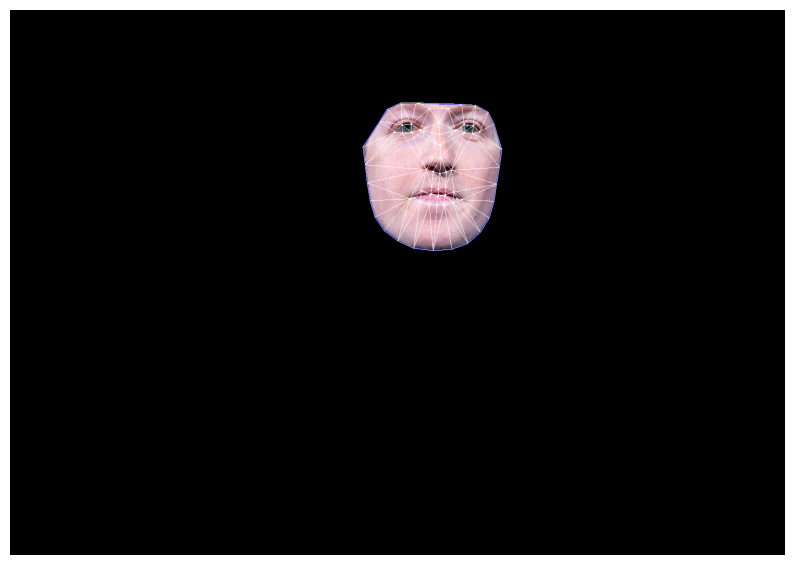

In [53]:
face_img2_copy = np.copy(face_image_2)

rect2 = cv2.boundingRect(convexhull2)
subdiv2 = cv2.Subdiv2D(rect2)
subdiv2.insert(landmarks_points2)
triangles2 = subdiv2.getTriangleList()
triangles2 = np.array(triangles2, dtype=np.int32)

for t in triangles2:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    cv2.line(face_img2_copy, pt1, pt2, (255, 255, 255), 1)
    cv2.line(face_img2_copy, pt2, pt3, (255, 255, 255), 1)
    cv2.line(face_img2_copy, pt1, pt3, (255, 255, 255), 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(face_img2_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [86]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

In [87]:
img = cv2.imread(SOURCE)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(DEST)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

mask = np.zeros_like(img_gray)
mask2 = np.zeros_like(img2_gray)

height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)
# Loading Face landmarks detector
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

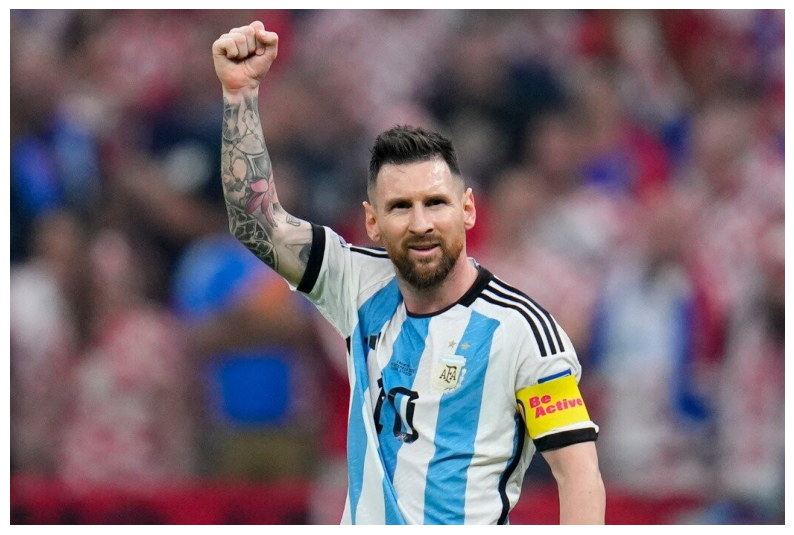

In [88]:
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        # cv2.circle(img, (x, y), 3, (0, 0, 255), -1)


    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    # cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    # cv2.fillConvexPoly(mask, convexhull, 255)

    face_image_1 = cv2.bitwise_and(img, img, mask=mask)
    
    # Delaunay triangulation
    rect = cv2.boundingRect(convexhull)
    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(landmarks_points)
    triangles = subdiv.getTriangleList()
    triangles = np.array(triangles, dtype=np.int32)

    indexes_triangles = []
    for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])


        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 = extract_index_nparray(index_pt1)

        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = extract_index_nparray(index_pt2)

        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = extract_index_nparray(index_pt3)

        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

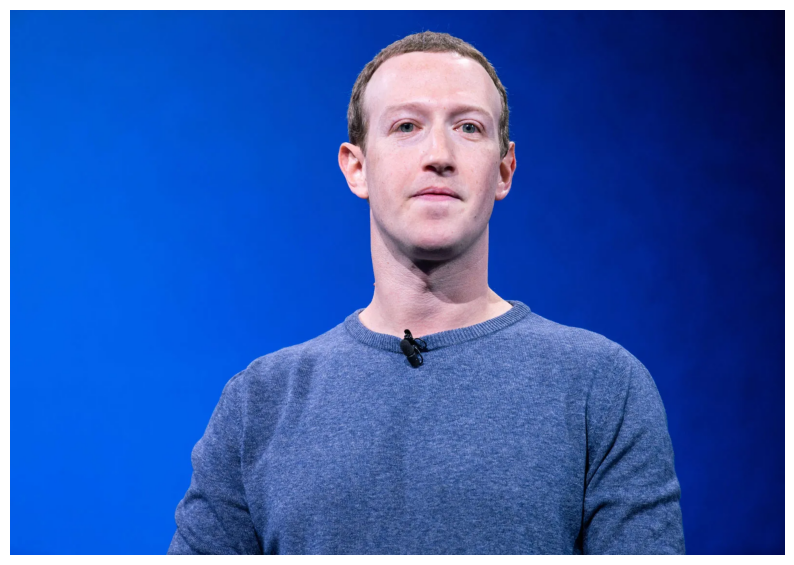

In [89]:
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))
        # cv2.circle(img2, (x, y), 3, (0, 0, 255), -1)


    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)

lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

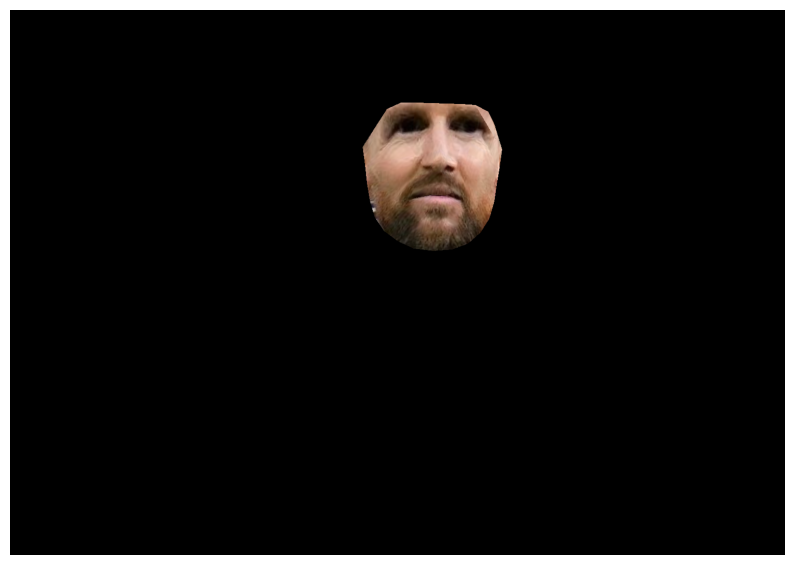

In [90]:
# Triangulation of both faces
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)


    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                       [tr1_pt2[0] - x, tr1_pt2[1] - y],
                       [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

    # Lines space
    cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
    cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
    cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
    lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)

    # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

    # Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

    # Reconstructing destination face
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area
plt.axis("off")
plt.imshow(cv2.cvtColor(img2_new_face, cv2.COLOR_BGR2RGB))
plt.show()    

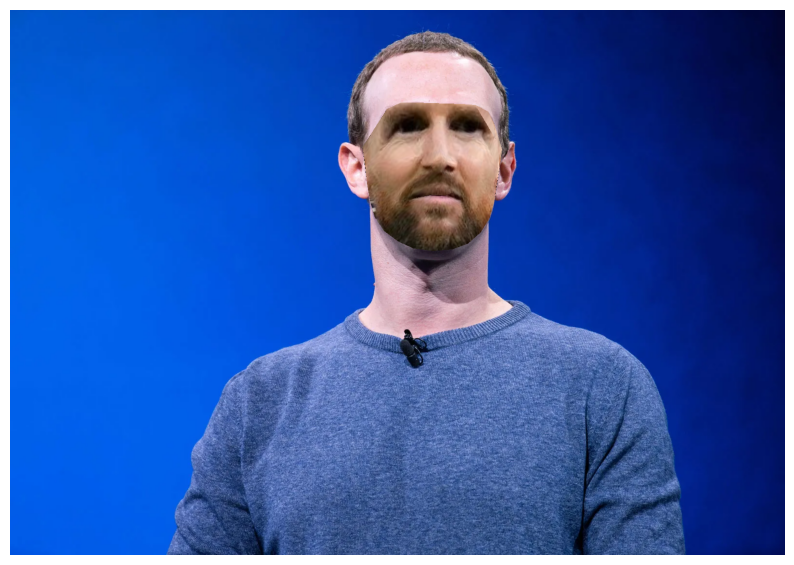

In [91]:
# Face swapped (putting 1st face into 2nd face)
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)


img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

plt.axis("off")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

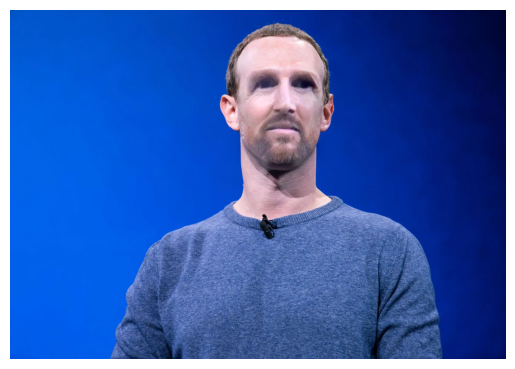

In [11]:
# Face swapped (putting 1st face into 2nd face)
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)


img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

plt.axis("off")
plt.imshow(cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB))
plt.show()